In [2]:
#1. Import dataset
import pandas as pd
train_set_clean_transform= pd.read_csv("train_set_clean_transform.csv")
test_set_clean_transform= pd.read_csv("test_set_clean_transform.csv")

In [3]:
# 4. Check data types of variables
print("\nData types of each column(Train):")
print(train_set_clean_transform.dtypes)
print("\nData types of each column(Test):")
print(test_set_clean_transform.dtypes)


Data types of each column(Train):
seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
Albuminuria            int64
MetabolicSyndrome      int64
QT_WaistCirc         float64
QT_BMI               float64
QT_UrAlbCr           float64
QT_UricAcid          float64
QT_BloodGlucose      float64
QT_HDL               float64
QT_Triglycerides     float64
dtype: object

Data types of each column(Test):
seqn                   int64
Age                    int64
Sex                   object
Marital               object
Income               float64
Race                  object
Albuminuria            int64
MetabolicSyndrome      int64
QT_WaistCirc         float64
QT_BMI               float64
QT_UrAlbCr           float64
QT_UricAcid          float64
QT_BloodGlucose      float64
QT_HDL               float64
QT_Triglycerides     float64
dtype: object


In [4]:
#6. Identify object type columns
object_cols = train_set_clean_transform.select_dtypes(include=['object']).columns
# Convert object type columns to category
train_set_clean_transform[object_cols] = train_set_clean_transform[object_cols].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(train_set_clean_transform.dtypes)
# Optional: Show memory usage before and after conversion
print("\nMemory usage before conversion:", train_set_clean_transform.memory_usage(deep=True).sum()/1024, "KB")
#7. Convert data types
train_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']] = train_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(train_set_clean_transform.dtypes)


#6. Identify object type columns
object_cols = test_set_clean_transform.select_dtypes(include=['object']).columns
# Convert object type columns to category
test_set_clean_transform[object_cols] = test_set_clean_transform[object_cols].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(test_set_clean_transform.dtypes)
# Optional: Show memory usage before and after conversion
print("\nMemory usage before conversion:", test_set_clean_transform.memory_usage(deep=True).sum()/1024, "KB")
#7. Convert data types
test_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']] = test_set_clean_transform[['Albuminuria', 'MetabolicSyndrome']].astype('category')
# Verify the conversion
print("Data types after conversion:")
print(test_set_clean_transform.dtypes)


Data types after conversion:
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria             int64
MetabolicSyndrome       int64
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Triglycerides      float64
dtype: object

Memory usage before conversion: 177.716796875 KB
Data types after conversion:
seqn                    int64
Age                     int64
Sex                  category
Marital              category
Income                float64
Race                 category
Albuminuria          category
MetabolicSyndrome    category
QT_WaistCirc          float64
QT_BMI                float64
QT_UrAlbCr            float64
QT_UricAcid           float64
QT_BloodGlucose       float64
QT_HDL                float64
QT_Trigl

In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix
)

# Features & target
drop_cols = ['seqn', 'MetabolicSyndrome']
target_col = 'MetabolicSyndrome'

X_train = train_set_clean_transform.drop(columns=drop_cols)
y_train = train_set_clean_transform[target_col]

X_test = test_set_clean_transform.drop(columns=drop_cols)
y_test = test_set_clean_transform[target_col]

# Identify categorical columns
cat_cols = X_train.select_dtypes(include='category').columns.tolist()

# One-hot encode categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)
    ],
    remainder='passthrough'  # Leave numeric features as is
)

# Build pipeline with preprocessing + model
model = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
])


In [6]:
# Train
model.fit(X_train, y_train)


C:\Users\Ashani Madushani\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Sex', 'Marital', 'Race',
                                                   'Albuminuria'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [7]:
def evaluate_model(model, X, y_true, dataset_name="Dataset"):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)

    print(f"📋 {dataset_name} Evaluation:")
    print(f"  Accuracy     : {acc:.4f}")
    print(f"  Precision    : {prec:.4f}")
    print(f"  Recall       : {rec:.4f}")
    print(f"  F1 Score     : {f1:.4f}")
    print(f"  Specificity  : {specificity:.4f}")
    print(f"  AUC          : {auc:.4f}")
    print()

# Evaluate on train and test sets
evaluate_model(model, X_train, y_train, "Training Set")
evaluate_model(model, X_test, y_test, "Testing Set")


📋 Training Set Evaluation:
  Accuracy     : 1.0000
  Precision    : 1.0000
  Recall       : 1.0000
  F1 Score     : 1.0000
  Specificity  : 1.0000
  AUC          : 1.0000

📋 Testing Set Evaluation:
  Accuracy     : 0.8780
  Precision    : 0.8355
  Recall       : 0.8038
  F1 Score     : 0.8194
  Specificity  : 0.9169
  AUC          : 0.9511



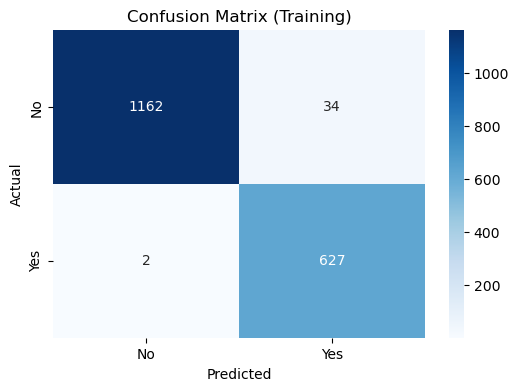


Classification Report (Training):
                      precision    recall  f1-score   support

No MetabolicSyndrome       1.00      0.97      0.98      1196
   MetabolicSyndrome       0.95      1.00      0.97       629

            accuracy                           0.98      1825
           macro avg       0.97      0.98      0.98      1825
        weighted avg       0.98      0.98      0.98      1825



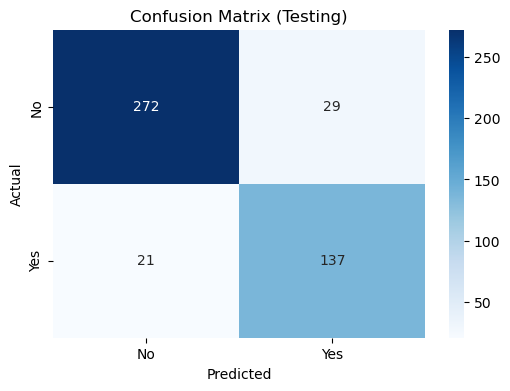


Classification Report (Testing):
                      precision    recall  f1-score   support

No MetabolicSyndrome       0.93      0.90      0.92       301
   MetabolicSyndrome       0.83      0.87      0.85       158

            accuracy                           0.89       459
           macro avg       0.88      0.89      0.88       459
        weighted avg       0.89      0.89      0.89       459


Training Metrics:
                         Value
Accuracy              0.980274
Sensitivity (Recall)  0.996820
Specificity           0.971572
F1 Score              0.972093
AUC-ROC               0.998933

Testing Metrics:
                         Value
Accuracy              0.891068
Sensitivity (Recall)  0.867089
Specificity           0.903654
F1 Score              0.845679
AUC-ROC               0.956075


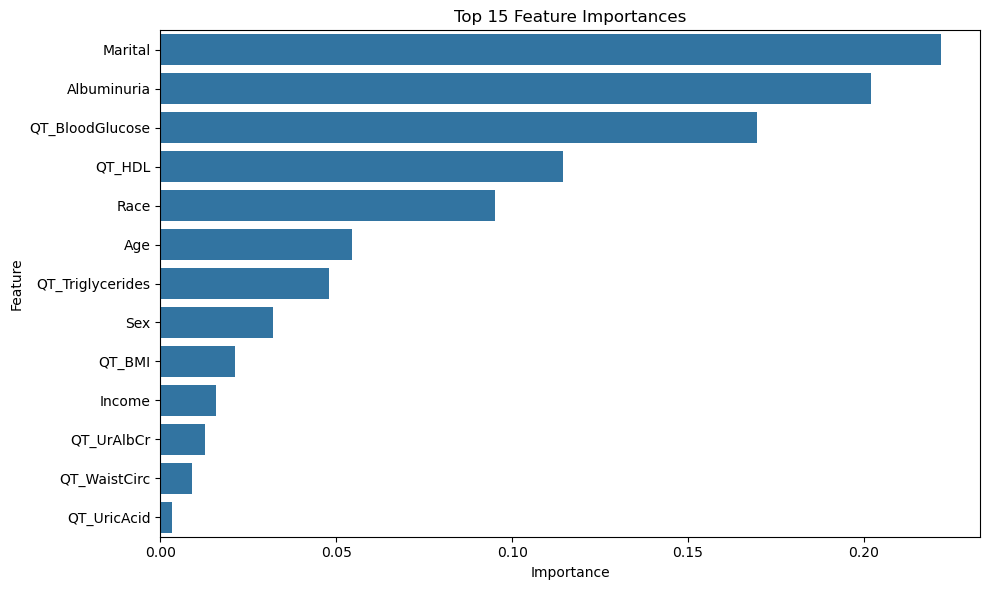

In [11]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, classification_report)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# =============================================
# 1. DATA PREPARATION
# =============================================

# Separate features and target (assuming seqn is index)
X_train = train_set_clean_transform.drop(['MetabolicSyndrome','seqn'], axis=1)
y_train = train_set_clean_transform['MetabolicSyndrome'].cat.codes  # Convert to 0/1

X_test = test_set_clean_transform.drop(['MetabolicSyndrome','seqn'], axis=1)
y_test = test_set_clean_transform['MetabolicSyndrome'].cat.codes

# =============================================
# 2. CATEGORICAL FEATURE HANDLING
# =============================================

# Answer to Q1: 
# - No standardization needed for Random Forest (tree-based models are scale-invariant)
# - Label encoding is sufficient (no need for one-hot encoding)

categorical_cols = X_train.select_dtypes(include='category').columns.tolist()

# Label encode categorical variables
for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))

# Numerical columns can remain as-is (including QT_* variables)
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# =============================================
# 3. RANDOM FOREST MODEL SETUP
# =============================================

# Initialize model with balanced class weights
rf_model = RandomForestClassifier(
    n_estimators=200,       # Number of trees
    max_depth=10,           # Maximum tree depth
    min_samples_split=5,    # Minimum samples to split a node
    min_samples_leaf=2,     # Minimum samples at a leaf node
    max_features='sqrt',    # Number of features to consider at each split
    class_weight='balanced',# Handles class imbalance
    random_state=42,
    n_jobs=-1              # Use all CPU cores
)

# Train model
rf_model.fit(X_train, y_train)

# =============================================
# 4. EVALUATION METRICS
# =============================================

def evaluate_model(model, X, y, dataset_name):
    y_pred = model.predict(X)
    y_proba = model.predict_proba(X)[:, 1]
    
    # Calculate metrics
    metrics = {
        'Accuracy': accuracy_score(y, y_pred),
        'Sensitivity (Recall)': recall_score(y, y_pred),
        'Specificity': recall_score(y, y_pred, pos_label=0),
        'F1 Score': f1_score(y, y_pred),
        'AUC-ROC': roc_auc_score(y, y_proba)
    }
    
    # Confusion matrix
    cm = confusion_matrix(y, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'], 
                yticklabels=['No', 'Yes'])
    plt.title(f'Confusion Matrix ({dataset_name})')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print(f"\nClassification Report ({dataset_name}):")
    print(classification_report(y, y_pred, target_names=['No MetabolicSyndrome', 'MetabolicSyndrome']))
    
    return metrics

# Evaluate on both sets
train_metrics = evaluate_model(rf_model, X_train, y_train, 'Training')
test_metrics = evaluate_model(rf_model, X_test, y_test, 'Testing')

# Display results
print("\nTraining Metrics:")
print(pd.DataFrame.from_dict(train_metrics, orient='index', columns=['Value']))

print("\nTesting Metrics:")
print(pd.DataFrame.from_dict(test_metrics, orient='index', columns=['Value']))

# =============================================
# 5. FEATURE IMPORTANCE
# =============================================

# Get feature importances
importances = rf_model.feature_importances_
feature_names = numeric_cols + categorical_cols

# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.tight_layout()
plt.show()

# =============================================
# ANSWERS TO YOUR QUESTIONS
# =============================================

#"""
#Q1: Does Random Forest require standardization and one-hot encoding?
#- Standardization: NOT needed (tree models are scale-invariant)
#- One-hot encoding: NOT needed (label encoding is sufficient)
#- Your QT_* variables can remain as-is

#Key Advantages:
#1. Handles mixed data types naturally
#2. Robust to outliers and non-linear relationships
#3. Built-in feature importance metrics
#4. Automatic handling of categorical features via label encoding
#5. Class imbalance handling through class_weight
#"""